<a href="https://colab.research.google.com/github/sandeepbelamagi/Netflix-EDA/blob/main/Netflix_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [33]:
import numpy as np
import pandas as pd
from pandas import DataFrame

import missingno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")

Loading the data

In [34]:
data = pd.read_csv('/content/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [36]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

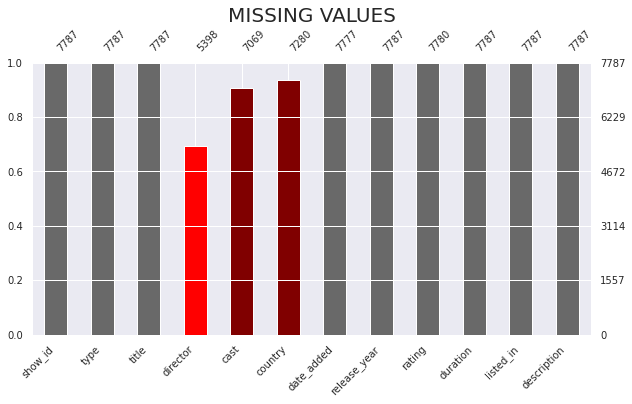

In [37]:
color= ['dimgrey','dimgrey','dimgrey','red','maroon','maroon','dimgrey','dimgrey','dimgrey','dimgrey','dimgrey','dimgrey']
missingno.bar(data,fontsize=10,color=color,figsize=(10,5))
plt.title('MISSING VALUES',fontsize=20);

As we can see, there are a lot of missing values in the director, cast and country columns. We will drop the director column as filling up the values will not be practically possible and Same for the cast column too. For the country column taking the mode of available countries and assigning the missing values. we will do the same for the date added and ratings column.

**Missing Values**

In [38]:
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])
data['rating'] = data['rating'].fillna(data['country'].mode()[0])

In [39]:
data.drop(['cast','director'],axis='columns',inplace=True)

In [40]:
data.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [41]:
data.duplicated().sum()

0

DATA CLEANING AND MANIPULATION¶

Adding some new columns:



*   Year Added - y_add
*   Month Added - m_add
*   Princial Country - country_main
*   Target Age Groups - target_age









In [42]:
data['y_add'] = data['date_added'].apply(lambda x: x.split(" ")[-1])
data['m_add'] = data['date_added'].apply(lambda x: x.split(" ")[0])

In [43]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_age'] = data['rating'].replace(ratings_ages)

In [44]:
data['country_main'] = data['country'].apply(lambda x: x.split(",")[0])

Making two new dataframes, one with movies collection and other with TV shows collection:

*   movie_df
*   tv_df



In [45]:
movie_df = data[data['type'] == 'Movie']
tv_df = data[data['type'] == 'TV Show']

In [46]:
movie_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,y_add,m_add,target_age,country_main
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,Mexico
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,Singapore
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,United States
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,United States
6,s7,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,June,Adults,Egypt


In [47]:
tv_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,y_add,m_add,target_age,country_main
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults,Brazil
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,July,Adults,Turkey
11,s12,TV Show,1983,"Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,November,Adults,Poland
12,s13,TV Show,1994,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,May,Adults,Mexico
16,s17,TV Show,Feb-09,United States,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,March,Teens,United States


**Data Visualization**

In [48]:
x = data['type'].value_counts().reset_index()
fig = px.pie(x,values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',marker = dict(line = dict(color = 'white', width = 1)))

As we can see, the content on Netflix dataset has 30.9% TV shows and 69.1% Movies.

Now let's look into categorization based upon other factors.

In [49]:
country_df = data['country_main'].value_counts().reset_index()
country_df = country_df[country_df['country_main'] /  country_df['country_main'].sum() > 0.01]

fig = px.pie(country_df, values='country_main', names='index',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',marker = dict(line = dict(color = 'white', width = 1)))
fig.show()

After dividing the dataset on the basis of country of production, we see that United States holds the highest percentage, of about half of the total content. India comes second in the list with about 14 percentage share. (Note: We have filled the NaN values in the country_main column with the mean() method. That can be counted as a factor of the dominance of United States)

In [50]:
def generate_df(df):
    new_df = df.groupby(['y_add', 'm_add']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['y_add', 'm_add', 'counts']
    new_df = new_df.sort_values('y_add')
    return new_df

In [51]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

movie_new_df = generate_df(movie_df)
tv_new_df = generate_df(tv_df)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
fig.add_trace(
    go.Pie(labels=movie_new_df['y_add'], values=movie_new_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=tv_new_df['y_add'], values=tv_new_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name",marker = dict(line = dict(color = 'white', width = 2)))

fig.update_layout(
    title_text="Content distribution by Year of Adding",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.18, y=0.5, font_size=17, showarrow=False, font_color='black'),dict(text='TV Shows', x=0.83, y=0.5, font_size=17, showarrow=False, font_color='black')])
fig.show()

Conclusion: The above plot shows the distribution of Movies and TV Shows separately based upon the year of adding. There is a noticable increase in the number of shows added throughout the years. For movies 2019 records the maximum number while for TV shows the year 2020 records the maximum number of addition of shows.

In [52]:
def generate_year_df(df,year):
    new_df = df.groupby(['target_age', 'y_add']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['target_age', 'y_add', 'counts']
    new_df = new_df.sort_values('y_add')
    new_df= new_df[new_df['y_add']==year]
    return new_df

In [53]:
group_2012 = generate_year_df(data,'2012')
group_2015 = generate_year_df(data,'2015')
group_2020 = generate_year_df(data,'2020')

fig = make_subplots(1, 3, specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}]],
                    subplot_titles=['2012', '2015','2020'])
fig.add_trace(go.Pie(labels=group_2012['target_age'], values=group_2012['counts'],scalegroup='one', 
                     name="Target audience 2012"), 1, 1)

fig.add_trace(go.Pie(labels=group_2015['target_age'], values=group_2015['counts'],scalegroup='one', 
                     name="Target audience 2015"), 1, 2)
fig.add_trace(go.Pie(labels=group_2020['target_age'], values=group_2020['counts'],scalegroup='one', 
                     name="Target audience 2020"), 1, 3)

fig.update_traces(textposition='inside',  hoverinfo="label+percent+name",
                  marker = dict(line = dict(color = 'white', width = 1),
                                colors = ['#3D0C02', '#800000' , '#C11B17','#C0C0C0'],))

fig.update_layout(title_text='Content distribution by target audience 2012 vs 2015 vs 2020')
fig.show()

Conclusion: The above plot shows content distribution by target age. The sizes of te plot is relative to the number of content added in the mentioned years. As it is clear from the plot, there was a huge increase in the number of content from the year 2012 to 2015 to 2020.

In [54]:
fig = px.histogram(data, x='country_main',color_discrete_sequence=['indianred'])
fig.update_xaxes(categoryorder='total ascending')
fig.show()

The above histogram represents the content added with respect to the country_main column.

In [55]:
def generate_age_df(df):
    new_df = df.groupby(['target_age']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['target_age', 'counts']
    new_df = new_df.sort_values('target_age')
    
    return new_df

In [56]:
movie_age_df = generate_age_df(movie_df)
fig = px.pie(labels = movie_age_df['target_age'], values = movie_age_df['counts'], names = movie_age_df['target_age'], width = 550, height = 550)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'], 
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Movies', 
                                      x = 0.5, y = 0.5, font_size = 40, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

Conclusion: The above plot shows the percentage of movies added based upon the target age. As one can see, the Adults section scores the highest number with 43.8%.

In [57]:
tv_age_df = generate_age_df(tv_df)
fig = px.pie(labels = tv_age_df['target_age'], values = tv_age_df['counts'], names = tv_age_df['target_age'], width = 550, height = 550)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'], 
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'TV Series', 
                                      x = 0.5, y = 0.5, font_size = 36, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

The above plot shows the percentage of TV series added based upon the target age. As one can see, the Adults section scores the highest number with 42.5%.

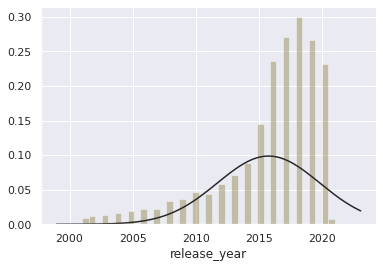

In [58]:
from scipy.stats import norm

sns.distplot(data.loc[data['release_year'] > 2000, 'release_year'],fit= norm, kde=False,
             color='#827839')

The above distplot is based upon the release_year of the movies/shows.

In [59]:
def generate_duration_df(df):
    new_df = df.groupby(['duration']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['duration', 'counts']
    new_df = new_df.sort_values('duration')
    return new_df

In [60]:
new_movie_df = generate_duration_df(movie_df)
fig = px.bar(x=new_movie_df['duration'], y = new_movie_df['counts'])
fig.update_traces(marker = dict(color= '#FFA62F'))

fig.update_xaxes(type='category',categoryorder='total ascending')

fig.show()

The above plot is based upon the duration of Movies. As we can see, the duration of 90 minutes records the highest number of movies.

In [61]:
new_tv_df = generate_duration_df(tv_df)
fig = px.bar(x=new_tv_df['duration'], y = new_tv_df['counts'])
fig.update_traces(marker = dict(color= '#E55451'))
fig.update_xaxes(type='category',categoryorder='total ascending')
fig.show()

The above plot is based upon the seasons of TV series. As we can see, only 1 season records the highest number of Tv series. Discontinuation of shows due to less popularity or pending release of next season might be a contributing factor.|

In [62]:
def generate_country_df(df):
    new_df = df.groupby(['country_main']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['country_main', 'counts']
    new_df = new_df.sort_values('country_main')
    return new_df

In [63]:
tv_country_df = generate_country_df(tv_df)
fig = px.pie(labels = tv_country_df['country_main'], values = tv_country_df['counts'], names = tv_country_df['country_main'], width = 550, height = 550)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'TV Series', 
                                      x = 0.5, y = 0.5, font_size = 40, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

Here is another pie plot depicting the percentage of TV series originating from a country. As noticed from the above, United States holds the highest percentage, i.e approx.44%.

In [64]:
movie_country_df = generate_country_df(movie_df)
fig = px.pie(labels = movie_country_df['country_main'], values = movie_country_df['counts'], names = movie_country_df['country_main'], width = 550, height = 550)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(line = dict(color = 'white', width = 2)))
                                

fig.update_layout(annotations = [dict(text = 'Movies', 
                                      x = 0.5, y = 0.5, font_size = 32, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

Here is another pie plot depicting the percentage of Movies originating from a country. As noticed from the above, United States holds the highest percentage, i.e approx.43.3%.